<a href="https://colab.research.google.com/github/sacamiso/AjedrezDistribuidos/blob/main/Amplicacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRABAJANDO CON CPUs**

En  este cuaderno voy ha entrenar mi modelo usando CPUs para después comprar los tiempos.

In [1]:
!unzip crops.zip

Archive:  crops.zip
  inflating: Agricultural-crops/Cherry/image15.jpeg  
  inflating: Agricultural-crops/Cherry/image16.jpeg  
  inflating: Agricultural-crops/Cherry/image17.jpeg  
  inflating: Agricultural-crops/Cherry/image18.jpeg  
  inflating: Agricultural-crops/Cherry/image20.jpeg  
  inflating: Agricultural-crops/Cherry/image21.jpeg  
  inflating: Agricultural-crops/Cherry/image22.jpeg  
  inflating: Agricultural-crops/Cherry/image24.jpeg  
  inflating: Agricultural-crops/Cherry/image25.jpeg  
  inflating: Agricultural-crops/Cherry/image27.jpeg  
  inflating: Agricultural-crops/Cherry/image28.jpeg  
  inflating: Agricultural-crops/Cherry/image29.jpeg  
  inflating: Agricultural-crops/Cherry/image30.jpeg  
  inflating: Agricultural-crops/Cherry/image31.jpeg  
  inflating: Agricultural-crops/Cherry/images11.jpg  
  inflating: Agricultural-crops/Cherry/images16.jpg  
  inflating: Agricultural-crops/Cherry/images17.jpg  
  inflating: Agricultural-crops/Cherry/images19.jpg  
  inflat

In [2]:
import os
import shutil
import random

ruta_carpetaRaiz = "Agricultural-crops"

# Porcentaje para las imágenes de test
porcentaje_test = 0.2

# Creo las carpetas de entrenamiento y test
ruta_entrenamiento = os.path.join(ruta_carpetaRaiz, "train")
ruta_test = os.path.join(ruta_carpetaRaiz, "test")
os.makedirs(ruta_entrenamiento, exist_ok=True)
os.makedirs(ruta_test, exist_ok=True)

# Reacorrp las subcarpetas
for cultivos in os.listdir(ruta_carpetaRaiz):
    # Creo la ruta completa de la subcarpeta de la verdura
    ruta_cultivo = os.path.join(ruta_carpetaRaiz, cultivos)
    
    # Si la ruta es una carpeta, recorro sus archivos, creo que no es necesario ya que todo son carpeta pero por si acaso lo compruebo
    if os.path.isdir(ruta_cultivo):
        
        ruta_entrenamiento_verdura = os.path.join(ruta_entrenamiento, cultivos)
        ruta_test_verdura = os.path.join(ruta_test, cultivos)
        os.makedirs(ruta_entrenamiento_verdura, exist_ok=True)
        os.makedirs(ruta_test_verdura, exist_ok=True)
        
        # Obtengo la lista de imagenes
        lista_imagenes = []
        for nombre_archivo in os.listdir(ruta_cultivo):
            # Obtenemos la extensión del archivo para comprobar que sean imágenes
            _, extension = os.path.splitext(nombre_archivo)
            
            # Si la extensión es una imagen, la añaso a la lista
            if extension.lower() in [".jpg", ".jpeg", ".png", ".bmp", ".gif"]: #Hay fotos con diferentes extensiones
                ruta_archivo = os.path.join(ruta_cultivo, nombre_archivo)
                lista_imagenes.append(ruta_archivo)
        
        # Calculo la cantidad de imágenes para test
        cantidad_test = int(len(lista_imagenes) * porcentaje_test)
        
        # Divido aleatoriamente la lista de archivos en entrenamiento y test
        random.shuffle(lista_imagenes)
        lista_entrenamiento = lista_imagenes[cantidad_test:]
        lista_test = lista_imagenes[:cantidad_test]
        
        # Muevo los archivos de entrenamiento
        for ruta_archivo in lista_entrenamiento:
            ruta_destino = os.path.join(ruta_entrenamiento_verdura, os.path.basename(ruta_archivo))
            shutil.copy(ruta_archivo, ruta_destino)
        
        # Muevo los archivos de test
        for ruta_archivo in lista_test:
            ruta_destino = os.path.join(ruta_test_verdura, os.path.basename(ruta_archivo))
            shutil.copy(ruta_archivo, ruta_destino)

In [3]:
for carpeta in os.listdir(ruta_carpetaRaiz):
  if os.path.isdir(os.path.join(ruta_carpetaRaiz,carpeta)):
    if carpeta != "train" and carpeta != "test":
      shutil.rmtree(os.path.join(ruta_carpetaRaiz,carpeta))

In [4]:
!pip install fastai -Uq

In [5]:
from fastai.vision.all import *

In [6]:
from google.colab import files
from sklearn.model_selection import train_test_split

In [7]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256,min_scale=0.75),Normalize.from_stats(*imagenet_stats)]) 

In [8]:
trainPath = Path('Agricultural-crops/train')

In [9]:
dls = db.dataloaders(trainPath, bs=128)

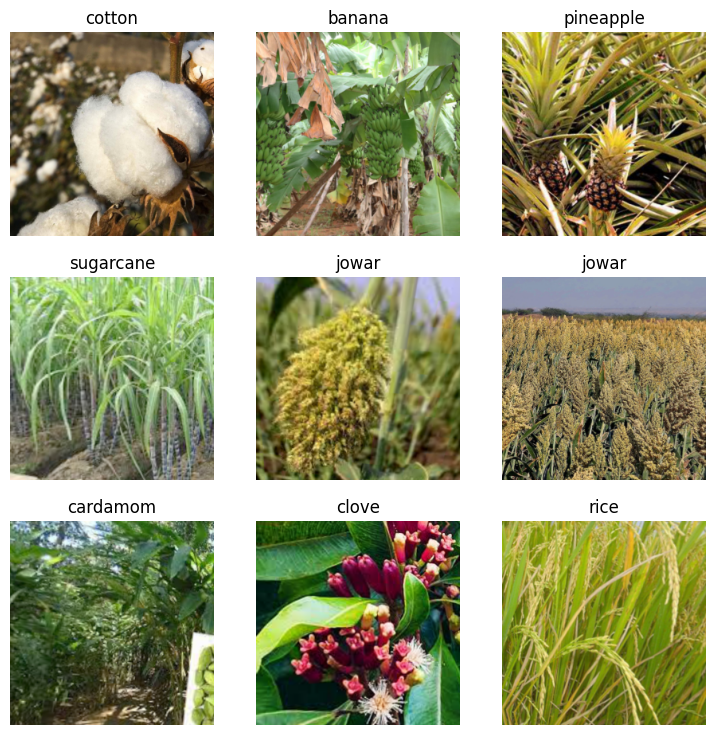

In [10]:
dls.show_batch()

In [11]:
learn = vision_learner(dls,resnet18,metrics=accuracy).to_fp16()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 111MB/s]


In [12]:
import time

In [13]:
inicio = time.time()
learn.fine_tune(10,base_lr=1e-3)
fin = time.time()

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,5.214961,4.447617,0.052239,03:23


epoch,train_loss,valid_loss,accuracy,time
0,4.580952,3.782598,0.052239,04:13
1,4.379561,3.279860,0.067164,04:11
2,4.078671,2.722015,0.223881,04:14
3,3.746928,2.234406,0.380597,04:11
4,3.393167,1.920529,0.455224,04:14
5,3.087792,1.734256,0.529851,04:10
6,2.794276,1.625388,0.567164,04:25
7,2.552051,1.571765,0.582090,04:11
8,2.361727,1.546462,0.604478,04:11
9,2.222416,1.539942,0.604478,04:19


In [14]:
print(fin-inicio)

2747.804534435272


In [15]:
total=(fin-inicio)/60

In [16]:
total

45.79674224058787

Como podemos obsevar sin la GPU ha tardado 45 minutos en hacer lo que con GPU tarda unos pocos segundos. Por lo tanto la diferencia es muy notable y merece la pena trabajar con GPU